In [1]:
import numpy as np
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']

### Задача 1

#### Даны значения зарплат из выборки выпускников:

#### 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

#### Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.), посчитайте (несмещённое) среднее квадратичное отклонение для данной выборки.

In [2]:
# создаём список с зарплатами выпускников

salaries = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [3]:
# посчитаем среднее арифметическое (выборочное среднее) по формуле
# sum(salary) суммирует все значения внутри списка (все x_i)
# len(salary) считает количество значений в списке (n)

salaries_mean = sum(salaries) / len(salaries)
salaries_mean

73.14285714285714

In [4]:
# посчитаем среднее квадратичное отклонение (несмещённое) по формуле
# среднее квадратичное отклонение (несмещённое) считается как корень выборочной дисперсии (несмещённой)
# выборочную дисперсию (несмещённую) можно посчитать как sum((i - salaries_mean) ** 2 for i in salaries) / (len(salaries) - 1)

std = round((sum((i - salaries_mean) ** 2 for i in salaries) / (len(salaries) - 1)) ** 0.5, 8)
std

47.34795214

In [5]:
# сравним с ответом, если посчитать при помощи numpy

std_numpy = np.std(salaries, ddof=1).round(8)
std_numpy

47.34795214

In [6]:
std == std_numpy

True

### Задача 2

#### Найдите число выбросов в выборке из задачи 1. Для определения выбросов используйте методику как при построении "усов" в boxplot, однако, как и в задаче 1, пользоваться можно только встроенными функциями и структурами данных.

In [7]:
# определяем первый и третий квартили

q1 = sorted(salaries)[len(salaries) // 4]
q3 = sorted(salaries)[3 * len(salaries) // 4]
q1, q3

(45, 84)

In [8]:
# считаем интерквартильное расстояние

iqr = q3 - q1
iqr

39

In [9]:
# определяем границы отрезка

boxplot_range = q1 - 1.5 * iqr, q3  + 1.5 * iqr
boxplot_range

(-13.5, 142.5)

In [10]:
# находим число выбросов

outliers = sum(i < boxplot_range[0] for i in salaries) | sum(i > boxplot_range[1] for i in salaries)
outliers

2

In [11]:
# проверим, какие значения попали в число выбросов

outliers_list = list(sorted((i for i in [i if i < boxplot_range[0] else False for i in salaries] +
                                        [i if i > boxplot_range[1] else False for i in salaries] if i is not False)))
outliers_list

[150, 230]

In [12]:
# число выбросов можно посчитать и при помощи функции len по списку выбросов

len(outliers_list)

2

<AxesSubplot:>

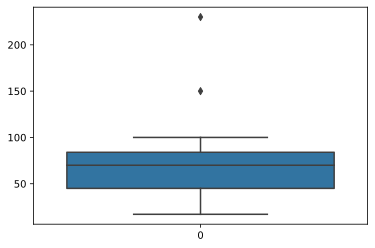

In [13]:
# сверим с тем, что показывает seaborn, должно быть 2 точки вне "усов"

sns.boxplot(data=salaries)

### Задача 3

#### В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:

#### 1. студент учится на факультете A,
#### 2. студент учится на факультете B,
#### 3. студент учится на факультете C?

In [14]:
# даны вероятности того, что студенты с определённого факультета (A, B, C) сдадут первую сессию

p_sa = 0.6
p_sb = 0.7
p_sc = 0.8

In [15]:
# посчитаем вероятности того, что студент выбран с определённого факультета (A, B, C)

p_a = 100 / 235
p_b = 90 / 235
p_c = 45 / 235
p_a, p_b, p_c

(0.425531914893617, 0.3829787234042553, 0.19148936170212766)

In [16]:
# посчитаем вероятность того, что случайным образом взятый студент сдал первую сессию

p_s = p_sa * p_a + p_sb * p_b + p_sc * p_c
p_s

0.676595744680851

In [17]:
# посчитаем вероятности того, что студент, cдавший первую сессию, учится на определённом факультете (A, B, C)

p_as = p_sa * p_a / p_s
p_bs = p_sb * p_b / p_s
p_cs = p_sc * p_c / p_s
p_as, p_bs, p_cs

(0.3773584905660377, 0.39622641509433965, 0.22641509433962265)

In [18]:
print(f'Видим, что более вероятно, что студент, сдавший первую сессию, с факультета B. Вероятность равна {p_bs}.\nОтвет: 2.')

Видим, что более вероятно, что студент, сдавший первую сессию, с факультета B. Вероятность равна 0.39622641509433965.
Ответ: 2.
